# Mathematical Finance Assignment # 2

### Yilak Kebede

In [1]:
import math 
import numpy as np
import scipy.stats as stats
import pythoncom
import pandas as pd 
import matplotlib.pyplot as plt
import scipy


# Cox-Ross-Rubinstein Method (Binomial tree)

!(Binomial tree options)[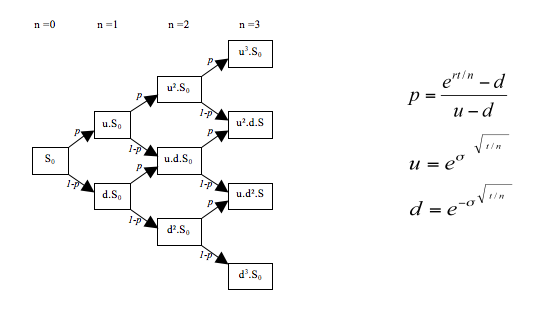]

American Put: 5.175066829025818
American Put: 3.7980481814331584
European Put: 3.7979906315054097
European Put: 3.7980481814331584
American Put: 10.182309480768188
American Put: 9.43700986482073
European Put: 9.436952314893015
European Put: 9.43700986482073
American Put: 15.748336641844586
American Put: 15.109789468167357
European Put: 15.109731918239513
European Put: 15.109789468167357
American Put: 23.10898317703714
American Put: 22.481261168778428
European Put: 22.481203618850678
European Put: 22.481261168778428


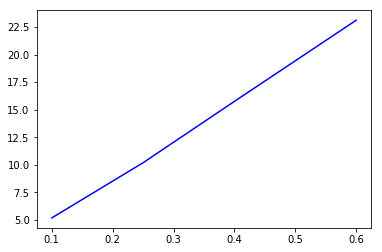

In [2]:
# main idea adapted from Mehdi Bounouar's paper ()
def BinomialTreeCRR(n, Spot, k, r, v, T, PutCall, OpStyle):

    dt= T/n
    u = np.exp(v*np.sqrt(dt))
    d = 1./u
    p = (np.exp(r*dt)-d)/(u-d)

    #Binomial price tree
    stkval = np.zeros((n+1,n+1))
    stkval[0,0] = Spot
    for i in range(1,n+1):
        stkval[i,0] = stkval[i-1,0]*u
        for j in range(1,i+1):
            stkval[i,j] = stkval[i-1,j-1]*d

    #option value at each final node
    optval = np.zeros((n+1,n+1))
    for j in range(n+1):
        if PutCall=="C": # Call
            optval[n,j] = max(0, stkval[n,j]-k)
        elif PutCall=="P": #Put
            optval[n,j] = max(0, k-stkval[n,j])

    #backward recursion for option price
    for i in range(n-1,-1,-1):
        for j in range(i+1):
            if OpStyle=="E":
                optval[i,j] = np.exp(-r*dt)*(p*optval[i+1,j] + (1-p)*optval[i+1,j+1])
            elif OpStyle=="A":
                if PutCall=="P":
                    optval[i,j] = max(k-stkval[i,j], np.exp(-r*dt)*(p*optval[i+1,j]+(1-p)*optval[i+1,j+1]))
                elif PutCall=="C":
                    optval[i,j] = max(stkval[i,j]-k, np.exp(-r*dt)*(p*optval[i+1,j]+(1-p)*optval[i+1,j+1]))
    return optval[0,0]


Spot = 95.123 #100.           # Spot Price
k = 100 #99.               # Strike Price
r = .05               # Annual Risk-free rate
T = 365./(365)        # Time in year (days/365)
n = 100                 # Number of steps

results1=[] 
results2=[]
v_options = [0.1,.25,.4,.6] #Annual Volatility
for v in v_options: 
    American_Put= BinomialTreeCRR(n, Spot, k, r, v, T, PutCall="P", OpStyle="A")
    American_Call=BinomialTreeCRR(n, Spot, k, r, v, T, PutCall="C", OpStyle="A")
    European_Put= BinomialTreeCRR(n, Spot, k, r, v, T, PutCall="P", OpStyle="E")
    European_Call=BinomialTreeCRR(n, Spot, k, r, v, T, PutCall="C", OpStyle="E")
    print("American Put:", American_Put)
    print("American Put:", American_Call)
    print("European Put:", European_Put)
    print("European Put:", European_Call)
    results1.append(American_Put)

pd.Series(results1,v_options).plot(color="blue")

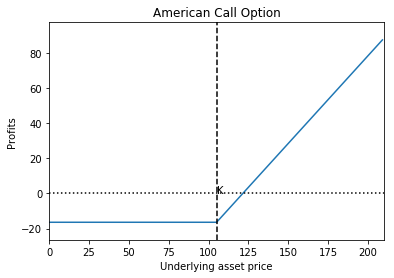

In [3]:
n = 10           
S = 100  
r = 0.06      
K = 105            
v = 0.4 
t = 1.

#Graphs and results for the Option prices

y = [-BinomialTreeCRR(n, S, K, r, v, t, "C","A")] * (K)
y += [x - BinomialTreeCRR(n, S, K, r, v, t, "C","A") for x in range(K)] 

plt.plot(range(2*K), y)
plt.axis([0, 2*K, min(y) - 10, max(y) + 10])
plt.xlabel('Underlying asset price')
plt.ylabel('Profits')
plt.axvline(x=K, linestyle='--', color='black')
plt.axhline(y=0, linestyle=':', color='black')
plt.title('American Call Option')
plt.text(105, 0, 'K')
plt.show()


# Black-Scholes Method

!(Black-Scholes Formula)[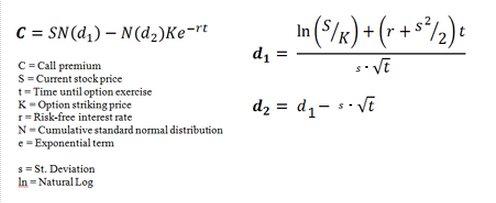]

### The Black-Scholes model applies to European options where it can be excersised only on expiration day. The user inputs all five variables (strike price, stock price, time (days), volatility and risk free interest rate)

### In the examples below, I tried to explore how each of the five varables affect the option types (both call and put) with different values

## 1. With different values of dividents

call_pricer: 9.563835552303125
put_pricer: 12.004402802408563
call_pricer: 9.040778895261845
put_pricer: 14.493874866817137
call_pricer: 7.219386255376548
put_pricer: 20.004767499533166
call_pricer: 4.962000470797479
put_pricer: 25.91718898987171
call_pricer: 1.4946936746404134
put_pricer: 37.61577625541454


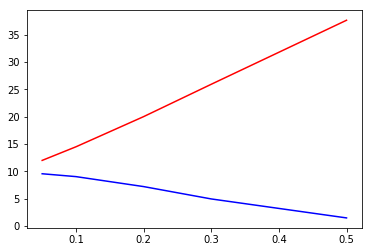

In [4]:
results1=[] 
results2=[]
div_options= [0.05,.1,.2,.3,.5] 
SO = 95.123 #100.           # Spot Price
k = 100 #99.               # Strike Price
r = .05               # Annual Risk-free rate
v= .2575             # Annual Volatility
T = 365./(365)        # Time in year (days/365)
n = 100                 # Number of steps

for div in div_options:
    d1= (np.log(SO/k)+((r-div)+ v**2/2)*T)/ (v*np.sqrt(T))
    d2= (np.log(SO/k)+((r-div)-v**2/2)*T)/ (v*np.sqrt(T))
    call_pricer= k*np.exp(-r*T)*stats.norm.cdf(d1)-k*np.exp(-r*T)*stats.norm.cdf(d2)
    put_pricer=k*np.exp(-r*T)*stats.norm.cdf(-d2)-SO*np.exp(-div*T)*stats.norm.cdf(-d1)
    print("call_pricer:",call_pricer)
    print("put_pricer:",put_pricer)
    results1.append(call_pricer)
    results2.append(put_pricer)
pd.Series(results1,div_options).plot(color="blue", label= "call_pricer") 
pd.Series(results2,div_options).plot(color="red", label= "put_pricer") 

## 2. with different Annual Risk-free rate values

call_pricer: 9.563835552303125
put_pricer: 12.004402802408563
call_pricer: 9.269564370645817
put_pricer: 9.269539803173913
call_pricer: 7.781456386268125
put_pricer: 5.176347030129804
call_pricer: 5.622443261409842
put_pricer: 2.627226977143703
call_pricer: 1.871711259811903
put_pricer: 0.4914481617887061
call_pricer: 0.34197321335872743
put_pricer: 0.05745568928781708
call_pricer: 0.03429025527853469
put_pricer: 0.004043059099002974
call_pricer: 0.010015754451735859
put_pricer: 0.0010303870744320532


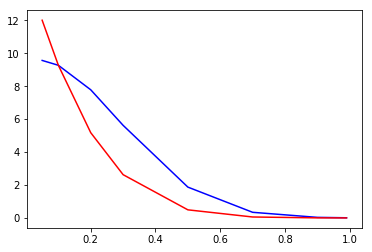

In [5]:
results1=[] 
results2=[]
r_options= [0.05,.1,.2,.3,.5,.7,.9,.99] 
SO = 95.123 #100.           # Spot Price
k = 100 #99.               # Strike Price
div = .05               # 
v= .2575             # Annual Volatility
T = 365./(365)        # Time in year (days/365)
n = 100                 # Number of steps

for r in r_options:
    d1= (np.log(SO/k)+((r-div)+ v**2/2)*T)/ (v*np.sqrt(T))
    d2= (np.log(SO/k)+((r-div)-v**2/2)*T)/ (v*np.sqrt(T))
    call_pricer= k*np.exp(-r*T)*stats.norm.cdf(d1)-k*np.exp(-r*T)*stats.norm.cdf(d2)
    put_pricer=k*np.exp(-r*T)*stats.norm.cdf(-d2)-SO*np.exp(-div*T)*stats.norm.cdf(-d1)
    print("call_pricer:",call_pricer)
    print("put_pricer:",put_pricer)
    results1.append(call_pricer)
    results2.append(put_pricer)
pd.Series(results1,r_options).plot(color="blue", label= "call_pricer") 
pd.Series(results2,r_options).plot(color="red", label= "put_pricer") 

## 3. with different maturity days < 365. / 365 days

call_pricer: 2.6765183350337303
put_pricer: 6.154836421957782
call_pricer: 3.4814520776181013
put_pricer: 6.744862618618001
call_pricer: 4.137416312176459
put_pricer: 7.260308626767888
call_pricer: 5.20149989184511
put_pricer: 8.140781836842919
call_pricer: 6.813752589841059
put_pricer: 9.538425997618987
call_pricer: 8.063917866715336
put_pricer: 10.65158453301732
call_pricer: 9.101959405717658
put_pricer: 11.586498354265046
call_pricer: 9.563835552303125
put_pricer: 12.004402802408563


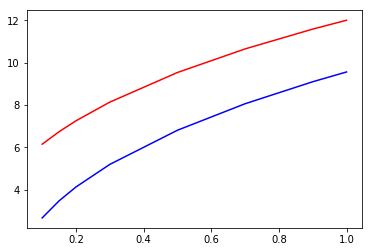

In [6]:
results1=[] 
results2=[]
T_options= [0.1,.15,.2,.3,.5,.7,.9,1] 
SO = 95.123 #100.           # Spot Price
k = 100 #99.               # Strike Price
div = .05               # 
v= .2575             # Annual Volatility
r= .05        
n = 100                 # Number of steps

for T in T_options:
    d1= (np.log(SO/k)+((r-div)+ v**2/2)*T)/ (v*np.sqrt(T))
    d2= (np.log(SO/k)+((r-div)-v**2/2)*T)/ (v*np.sqrt(T))
    call_pricer= k*np.exp(-r*T)*stats.norm.cdf(d1)-k*np.exp(-r*T)*stats.norm.cdf(d2)
    put_pricer=k*np.exp(-r*T)*stats.norm.cdf(-d2)-SO*np.exp(-div*T)*stats.norm.cdf(-d1)
    print("call_pricer:",call_pricer)
    print("put_pricer:",put_pricer)
    results1.append(call_pricer)
    results2.append(put_pricer)
pd.Series(results1,T_options).plot(color="blue", label= "call_pricer") 
pd.Series(results2,T_options).plot(color="red", label= "put_pricer") 

## 4. with different Annual Volatility

call_pricer: 3.3479128265962927
put_pricer: 6.473039127713186
call_pricer: 5.380193780303166
put_pricer: 8.172605240456818
call_pricer: 7.344729372821263
put_pricer: 9.940871961844245
call_pricer: 11.186746915232753
put_pricer: 13.537160564452961
call_pricer: 18.686746691915225
put_pricer: 20.72974225585989
call_pricer: 25.96780854499059
put_pricer: 27.778404744346865


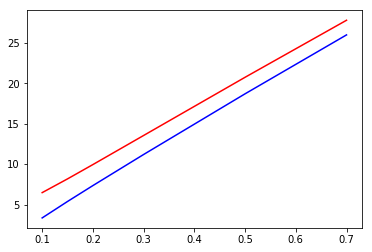

In [7]:
results1=[] 
results2=[]
v_options= [0.1,.15,.2,.3,.5,.7] 
SO = 95.123 #100.           # Spot Price
k = 100 #99.               # Strike Price
div = .05               # 
T= 365./(365)        # Time in year (days/365)            
r= .05        
n = 100                 # Number of steps

for v in v_options:
    d1= (np.log(SO/k)+((r-div)+ v**2/2)*T)/ (v*np.sqrt(T))
    d2= (np.log(SO/k)+((r-div)-v**2/2)*T)/ (v*np.sqrt(T))
    call_pricer= k*np.exp(-r*T)*stats.norm.cdf(d1)-k*np.exp(-r*T)*stats.norm.cdf(d2)
    put_pricer=k*np.exp(-r*T)*stats.norm.cdf(-d2)-SO*np.exp(-div*T)*stats.norm.cdf(-d1)
    print("call_pricer:",call_pricer)
    print("put_pricer:",put_pricer)
    results1.append(call_pricer)
    results2.append(put_pricer)
pd.Series(results1,v_options).plot(color="blue", label= "call_pricer") 
pd.Series(results2,v_options).plot(color="red", label= "put_pricer") 

## 5 with different stock price 

call_pricer: 9.269564370645817
put_pricer: 9.269539803173913
call_pricer: 8.653708415193655
put_pricer: 7.006003963167686
call_pricer: 7.781456386268125
put_pricer: 5.176347030129804
call_pricer: 5.622443261409842
put_pricer: 2.627226977143703
call_pricer: 1.871711259811903
put_pricer: 0.4914481617887061
call_pricer: 0.34197321335872743
put_pricer: 0.05745568928781708
call_pricer: 0.03429025527853469
put_pricer: 0.004043059099002974
call_pricer: 0.008670391532987765
put_pricer: 0.0008792278034776176


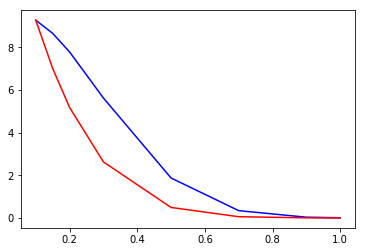

In [15]:
results1=[] 
results2=[]
r_options= [0.1,.15,.2,.3,.5,.7,.9,1] 
SO = 95.123 #100.           # Spot Price
k = 100 #99.               # Strike Price
div = .05               # 
v= .2575             # Annual Volatility
T= 365./(365)        # Time in year (days/365)       
n = 100                 # Number of steps

for r in r_options:
    d1= (np.log(SO/k)+((r-div)+ v**2/2)*T)/ (v*np.sqrt(T))
    d2= (np.log(SO/k)+((r-div)-v**2/2)*T)/ (v*np.sqrt(T))
    call_pricer= k*np.exp(-r*T)*stats.norm.cdf(d1)-k*np.exp(-r*T)*stats.norm.cdf(d2)
    put_pricer=k*np.exp(-r*T)*stats.norm.cdf(-d2)-SO*np.exp(-div*T)*stats.norm.cdf(-d1)
    print("call_pricer:",call_pricer)
    print("put_pricer:",put_pricer)
    results1.append(call_pricer)
    results2.append(put_pricer)
pd.Series(results1,r_options).plot(color="blue", label= "call_pricer") 
pd.Series(results2,r_options).plot(color="red", label= "put_pricer") 

call_pricer: 1.1860398144030464
put_pricer: 38.18748198199412
call_pricer: 6.366570976318181
put_pricer: 21.17968448603456
call_pricer: 8.662389945672182
put_pricer: 14.527230601594972
call_pricer: 9.462492596167081
put_pricer: 9.462492596167081
call_pricer: 7.2629669714757625
put_pricer: 3.5251450350617546
call_pricer: 2.5572864642326465
put_pricer: 0.63909545170306
call_pricer: 0.20671998120363355
put_pricer: 0.027868227076203456


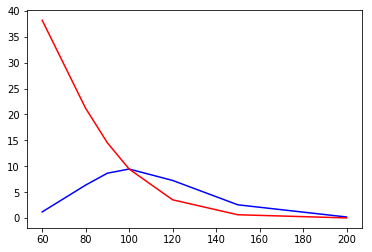

In [8]:
results1=[] 
results2=[]
SO_options= [60,80,90,100,120,150,200] 
v= .25          
k = 100 #99.               # Strike Price
div = .05               # 
T= 365./(365)        # Time in year (days/365)            
r= .05        
n = 100                 # Number of steps

for SO in SO_options:
    d1= (np.log(SO/k)+((r-div)+ v**2/2)*T)/ (v*np.sqrt(T))
    d2= (np.log(SO/k)+((r-div)-v**2/2)*T)/ (v*np.sqrt(T))
    call_pricer= k*np.exp(-r*T)*stats.norm.cdf(d1)-k*np.exp(-r*T)*stats.norm.cdf(d2)
    put_pricer=k*np.exp(-r*T)*stats.norm.cdf(-d2)-SO*np.exp(-div*T)*stats.norm.cdf(-d1)
    print("call_pricer:",call_pricer)
    print("put_pricer:",put_pricer)
    results1.append(call_pricer)
    results2.append(put_pricer)
pd.Series(results1,SO_options).plot(color="blue", label= "call_pricer") 
pd.Series(results2,SO_options).plot(color="red", label= "put_pricer") 

## 6 with different Strike Price

call_pricer: 1.0475332774553507
put_pricer: 0.2284368391035989
call_pricer: 5.96320032591472
put_pricer: 2.9882981414967027
call_pricer: 8.311033125989688
put_pricer: 6.534749356940161
call_pricer: 9.276091332630777
put_pricer: 11.734336155191123
call_pricer: 7.389916129683357
put_pricer: 26.069676575256068
call_pricer: 2.7232567518055206
put_pricer: 52.582062640944685


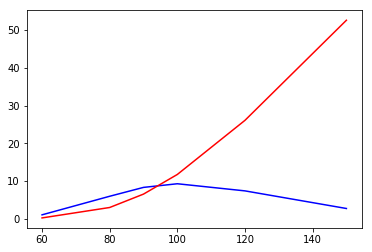

In [9]:
results1=[] 
results2=[]
k_options= [60,80,90,100,120,150] 
v= .25          
SO = 95.123
div = .05               # 
T= 365./(365)        # Time in year (days/365)            
r= .05        
n = 100                 # Number of steps

for k in k_options:
    d1= (np.log(SO/k)+((r-div)+ v**2/2)*T)/ (v*np.sqrt(T))
    d2= (np.log(SO/k)+((r-div)-v**2/2)*T)/ (v*np.sqrt(T))
    call_pricer= k*np.exp(-r*T)*stats.norm.cdf(d1)-k*np.exp(-r*T)*stats.norm.cdf(d2)
    put_pricer=k*np.exp(-r*T)*stats.norm.cdf(-d2)-SO*np.exp(-div*T)*stats.norm.cdf(-d1)
    print("call_pricer:",call_pricer)
    print("put_pricer:",put_pricer)
    results1.append(call_pricer)
    results2.append(put_pricer)
pd.Series(results1,k_options).plot(color="blue", label= "call_pricer") 
pd.Series(results2,k_options).plot(color="red", label= "put_pricer")